# Beta-Distribution

In [1]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import datetime,time,warnings,sys,os,itertools,math

from scipy.stats import beta

In [5]:
beta.ppf(0.95,2,50)

0.08967153829142849

In [10]:
x = np.linspace(0.05,0.95,10000)
y = beta.ppf(x,2,50)

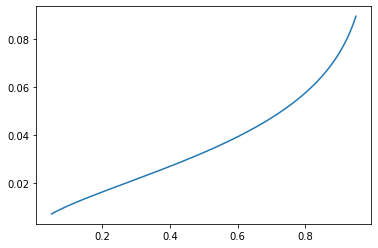

In [11]:
plt.plot(x,y)

In [12]:
x

array([0.05      , 0.05009001, 0.05018002, ..., 0.94981998, 0.94990999,
       0.95      ])

# Convolution

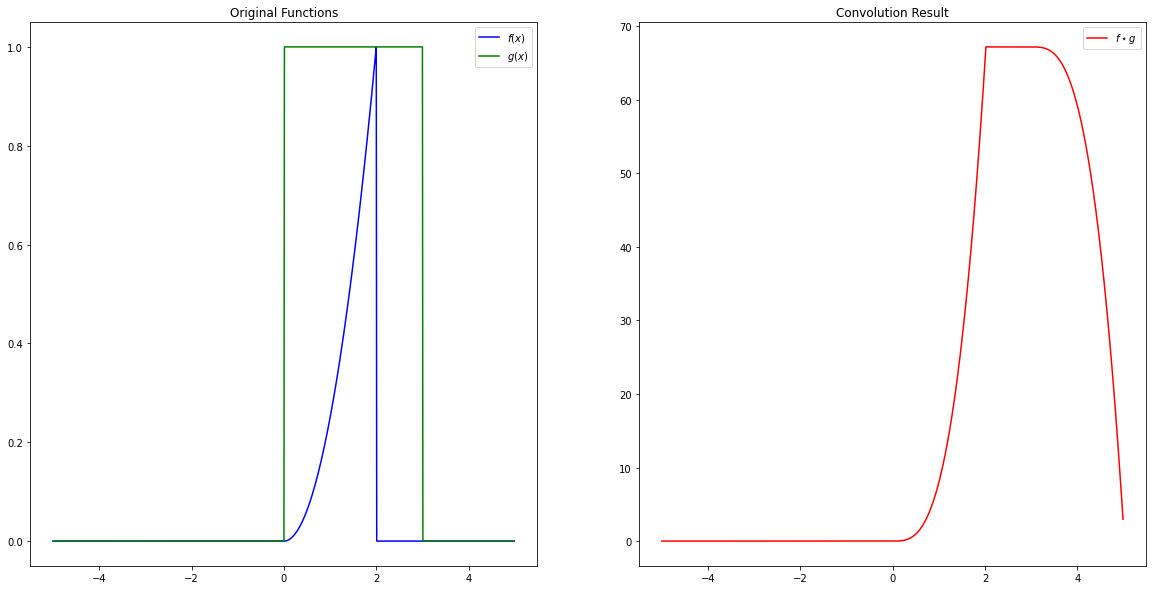

In [4]:
# Imports
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt

# Define f as polynomial
def f(x):
    y = 0.25*x**2
    for k in range(y.shape[0]):
        if x[k]<=0:
            y[k] = 0
        elif x[k]>2:
            y[k] = 0
    return y

# Define g as constant interval
def g(x):
    y = np.zeros_like(x)
    for k in range(y.shape[0]):
        if x[k]>=0 and x[k]<=3:
            y[k] = 1
    return y

# Set x-axis
xaxis = np.arange(-5,5,0.01)
# Calculate f and g values over x
ff = f(xaxis)
gg = g(xaxis)
# Convolve while maintaining the x-axis length
zeta = np.convolve(ff,gg,mode='same')

# Create figure
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(20)
# Plot original functions
ax1.plot(xaxis,ff,'b')
ax1.plot(xaxis,gg,'g')
# Plot convolution
ax2.plot(xaxis,zeta,'r')
# Configure
ax1.legend(['$f(x)$','$g(x)$'])
ax1.set_title('Original Functions')
ax2.legend(['$f\star g$'])
ax2.set_title('Convolution Result')
# Instantiate
plt.show()

# Sampling from arbitrary Distributions

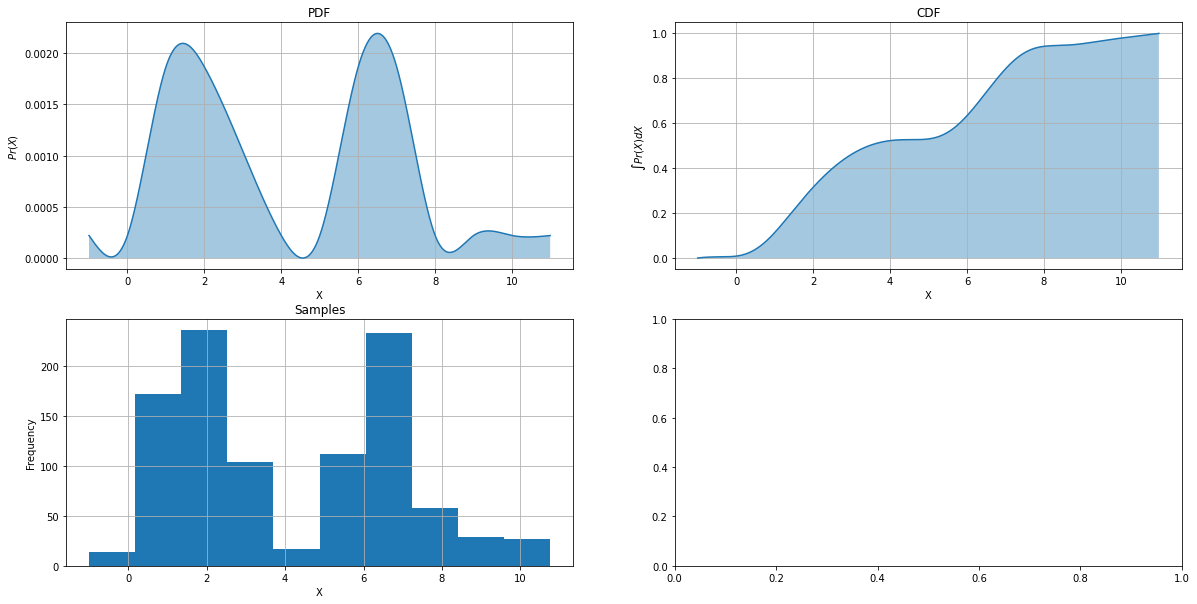

In [41]:
# Imports
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
from scipy.interpolate import CubicSpline
# Initial function template
x = [-1,0,1,2,3,4,5,6,7,8,9,10,11]
y = [0,0,1,1,0.5,0,0,1,1,0,0,0,0]
# Spline based on inputs
f = CubicSpline(x,y,bc_type='natural')
# Define x-axis
xaxis = np.arange(-1,11,0.01)
# Interpolate and normalize y-axis
paxis = f(xaxis)
paxis += np.abs(np.min(paxis))
paxis /= np.sum(paxis)
# Calculate probability mass function
pmf = np.cumsum(paxis)
# Normal sampling of y-axis - 1000 samples
norm_samples = rnd.rand(1000).tolist()
# Invert pmf function along samples
p_samples = []
for s in norm_samples:
    c_loc = np.where(np.min(np.abs(pmf-s))==np.abs(pmf-s))
    inv_s = xaxis[c_loc]
    p_samples.append(inv_s[0])
# Plot results
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(20,10))
# Draw PDF
ax[0,0].plot(xaxis,paxis)
ax[0,0].fill_between(xaxis,paxis,step="pre",alpha=0.4)
ax[0,0].grid()
ax[0,0].set_xlabel('X')
ax[0,0].set_ylabel('$Pr(X)$')
ax[0,0].set_title('PDF')
# Draw CDF
ax[0,1].plot(xaxis,pmf)
ax[0,1].fill_between(xaxis,pmf,step="pre",alpha=0.4)
ax[0,1].grid()
ax[0,1].set_xlabel('X')
ax[0,1].set_ylabel('$\int Pr(X) dX$')
ax[0,1].set_title('CDF')
# Draw sampling results
ax[1,0].hist(p_samples)
ax[1,0].grid()
ax[1,0].set_xlabel('X')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_title('Samples')
# Show plot
plt.show()